# Model selection

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler


#NN parts
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import scipy as sp

## Load data

In [2]:
# leer data
data_m = pd.read_csv('../../data/processed/data_m_v1.csv')
data_f = pd.read_csv('../../data/processed/data_f_v1.csv')
data_m

,edad,peso,talla,per_brazo_rel,per_brazo_ten,per_antebrazo,per_torax,per_cintura,per_cadera,per_muslo_max,per_muslo_medial,per_pantorrilla,masa_piel,masa_adiposa,masa_muscular,masa_residual,masa_osea
0,-1.036390,-1.129647,-1.041523,-0.245085,-0.364953,-0.791100,-0.661568,-1.015423,-1.182268,-1.117874,-1.535150,-1.224345,3.585589,17.189072,32.433673,7.148282,7.474786
1,-0.425749,-1.106688,0.645564,-1.516202,-2.004565,-1.668563,-2.015216,-1.005378,-0.498441,-1.117874,-1.422207,-0.332794,3.764521,24.290302,25.310796,6.384089,9.142289
2,0.033609,1.495342,-1.424952,3.133412,2.974995,2.718753,1.299323,1.355101,1.642233,2.023883,2.033875,1.681451,4.229962,39.435706,41.820398,11.560786,10.609290
3,-0.378883,0.576979,-0.581408,0.357024,0.788847,0.757365,0.413759,0.551533,0.675956,0.750198,0.633371,1.483329,4.106494,28.820770,38.656728,10.132910,10.732621
4,0.297577,-0.326079,0.338821,0.055969,0.667394,0.602518,-0.092277,-0.000919,-0.394381,-0.948049,-0.518656,-0.762059,3.965215,17.866439,37.797663,9.785320,8.850928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,-1.340331,-2.178113,-0.734780,-1.783806,-1.609843,-1.823410,-2.154376,-2.150461,-2.371532,-2.285419,-2.619411,-2.776305,3.280333,12.413889,23.242262,5.378595,7.311850
149,-0.919913,-1.091382,-1.041523,-0.010932,-0.243501,-0.326561,-0.408550,-0.854709,-1.122805,-0.948049,-0.902665,-1.158304,3.596988,16.477752,34.365242,7.527648,7.474786
150,0.968523,0.148409,-0.734780,-0.077832,0.120857,0.137979,0.666777,0.551533,-0.290320,-0.098926,0.249362,-0.002590,3.977372,16.785899,41.176544,10.735525,9.292465
151,1.273154,1.495342,-1.194895,1.795393,1.760468,1.531597,1.742105,2.048177,1.478709,1.068619,0.994792,1.549370,4.258235,29.831738,44.134553,13.106154,11.448103


## add features

## Model

In [5]:
x_columns = data_m.columns.drop(['masa_piel', 'masa_adiposa', 'masa_muscular', 'masa_residual',
       'masa_osea'])
y_columns = ['masa_piel', 'masa_adiposa', 'masa_muscular', 'masa_residual',
       'masa_osea']

X_m = data_m[x_columns].values
y_m = data_m[y_columns].values

X_f = data_f[x_columns].values
y_f = data_f[y_columns].values


In [6]:
x_columns

Index(['edad', 'peso', 'talla', 'per_brazo_rel', 'per_brazo_ten',
       'per_antebrazo', 'per_torax', 'per_cintura', 'per_cadera',
       'per_muslo_max', 'per_muslo_medial', 'per_pantorrilla'],
      dtype='object')

## split data 

In [7]:
# Create train/test
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(    
    X_m, y_m, test_size=0.25, random_state=42)

x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(    
    X_f, y_f, test_size=0.25, random_state=42)

## Model

### masc

In [25]:
# Build the neural network
model = Sequential()

model.add(Dense(50, input_dim=X_m.shape[1], activation='relu',kernel_initializer='random_normal')) #input + hidden layer 1
#model.add(Dense(50, activation='relu',kernel_initializer='random_normal')) #hidden layer 2
model.add(Dense(20, activation='relu',kernel_initializer='random_normal')) #hidden layer 3
model.add(Dense(y_m.shape[1],kernel_initializer='random_normal')) #output ,activation='softmax'
model.compile(loss='mean_squared_error', 
              optimizer='adam')  #metrics =['r2']
# EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-1, 
    patience=5, verbose=1, mode='auto', restore_best_weights=True)

model.fit(x_train_m,y_train_m,validation_data=(x_test_m,y_test_m),
        callbacks=[monitor],verbose=2,epochs=1000)  #print the result and train

Epoch 1/1000
4/4 - 3s - loss: 437.2651 - val_loss: 463.6984
Epoch 2/1000
4/4 - 0s - loss: 436.9331 - val_loss: 463.2927
Epoch 3/1000
4/4 - 0s - loss: 436.5158 - val_loss: 462.7851
Epoch 4/1000
4/4 - 0s - loss: 436.0319 - val_loss: 462.1460
Epoch 5/1000
4/4 - 0s - loss: 435.4115 - val_loss: 461.3245
Epoch 6/1000
4/4 - 0s - loss: 434.6192 - val_loss: 460.2756
Epoch 7/1000
4/4 - 0s - loss: 433.5940 - val_loss: 458.9366
Epoch 8/1000
4/4 - 0s - loss: 432.3688 - val_loss: 457.2278
Epoch 9/1000
4/4 - 0s - loss: 430.7412 - val_loss: 455.0984
Epoch 10/1000
4/4 - 0s - loss: 428.7179 - val_loss: 452.4344
Epoch 11/1000
4/4 - 0s - loss: 426.2075 - val_loss: 449.1209
Epoch 12/1000
4/4 - 0s - loss: 423.0717 - val_loss: 445.0716
Epoch 13/1000
4/4 - 0s - loss: 419.2798 - val_loss: 440.1830
Epoch 14/1000
4/4 - 0s - loss: 414.8028 - val_loss: 434.3441
Epoch 15/1000
4/4 - 0s - loss: 409.6393 - val_loss: 427.4619
Epoch 16/1000
4/4 - 0s - loss: 403.2588 - val_loss: 419.5711
Epoch 17/1000
4/4 - 0s - loss: 39

In [28]:
# Predict
y_pred = model.predict(x_test_m)
y_pred

array([[ 3.8027167, 22.78587  , 37.20538  ,  9.709406 ,  9.512469 ],
       [ 4.7665215, 29.623306 , 48.356853 , 12.639376 , 12.26217  ],
       [ 3.5186718, 19.485544 , 31.71715  ,  8.128413 ,  8.237141 ],
       [ 4.0356774, 23.843407 , 38.85854  , 10.088695 ,  9.941538 ],
       [ 5.648857 , 33.090546 , 53.641182 , 13.779846 , 13.65358  ],
       [ 4.5213404, 25.229088 , 40.83875  , 10.397192 , 10.501031 ],
       [ 3.4390662, 19.240702 , 31.413626 ,  8.079706 ,  8.164193 ],
       [ 4.190679 , 24.263731 , 39.397335 , 10.155855 , 10.076954 ],
       [ 4.5571136, 27.174463 , 44.15927  , 11.444423 , 11.233707 ],
       [ 3.550989 , 19.918037 , 32.48973  ,  8.351429 ,  8.430596 ],
       [ 4.3369565, 26.23787  , 42.74018  , 11.12846  , 10.869974 ],
       [ 4.4521914, 26.486595 , 43.053158 , 11.157383 , 10.960649 ],
       [ 3.3352897, 19.222801 , 31.472797 ,  8.170663 ,  8.143975 ],
       [ 4.1657743, 25.453249 , 41.564827 , 10.863129 , 10.582558 ],
       [ 3.6106012, 20.09616  , 32

masa_piel
R2 = 0.19 , MSE = 0.103 and MAE = 0.233
---------------------------------
masa_adiposa
R2 = 0.408 , MSE = 36.757 and MAE = 4.737
---------------------------------
masa_muscular
R2 = 0.733 , MSE = 10.879 and MAE = 2.66
---------------------------------
masa_residual
R2 = 0.798 , MSE = 0.793 and MAE = 0.76
---------------------------------
masa_osea
R2 = 0.701 , MSE = 0.612 and MAE = 0.61
---------------------------------


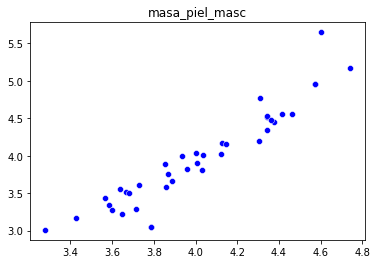

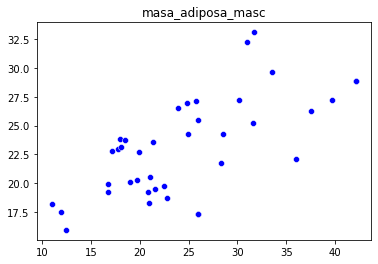

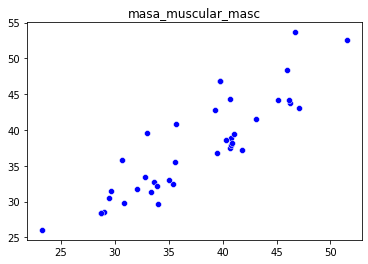

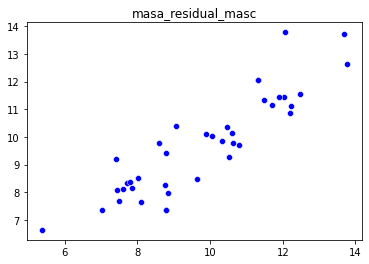

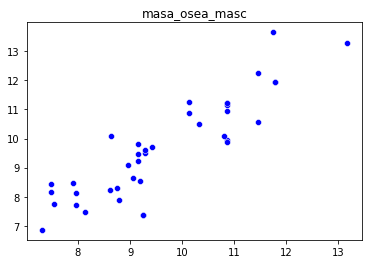

In [31]:
y_pred = model.predict(x_test_m)
for index,target in enumerate(y_columns):
    MSE = mean_squared_error(y_test_m[:,index],y_pred[:,index])
    MAE = mean_absolute_error(y_test_m[:,index],y_pred[:,index])
    R2 = r2_score(y_test_m[:,index],y_pred[:,index])
    print(f'{target}')
    print(f'R2 = {round(R2,3)} , MSE = {round(MSE,3)} and MAE = {round(MAE,3)}')
    plt.figure()
    sns.scatterplot(x=y_test_m[:,index],y=y_pred[:,index], color='blue')
    plt.title(target+'_masc')
    print('-'*33)